# Wild Fires in US 
# Objectives  
*    **Impact on Land (How many and how big across all states?)**
*    **Causes of fires & Is there a correlation between fires and air pollution?**
### DataSets from Kaggle 
    * 1.88 Million US Wildfires (1992 - 2015)  https://www.kaggle.com/rtatman/188-million-us-wildfires
    * US Pollution Data (2000 - 2016) https://www.kaggle.com/sogun3/uspollution

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from geopy.geocoders import Nominatim

### PART  I
### Read Wild Fires Data into a DataFrame
Wild Fires Data is in sqlite format
Use the pandas read_sql_query function to read the results of a SQL query directly into a DataFrame

In [2]:
# Create a SQL connection to SQLite database
cnx = sqlite3.connect('./data/FPA_FOD_20170508.sqlite')
df = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,FIRE_SIZE_CLASS FROM 'Fires'", cnx)

# Print number of rows in the Fires table
print(df.shape[0])

# close the connection
cnx.close()

1880465


### Read top 5 rows and analyze the column data
    * FIRE_YEAR = Calendar year in which the fire was discovered or confirmed to exist.
    * DISCOVERY_DATE = Date on which the fire was discovered or confirmed to exist.
    * LATITUDE = Latitude (NAD83) for point location of the fire (decimal degrees).
    * LONGITUDE = Longitude (NAD83) for point location of the fire (decimal degrees).
    * FIRE_SIZE = Estimate of acres within the final perimeter of the fire.
    * FIRESIZECLASS = Code for fire size based on the number of acres within the final fire perimeter expenditures (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres).


In [3]:
df.head(5)

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,FIRE_SIZE_CLASS
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,0.10,A
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,0.25,A
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,0.10,A
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,0.10,A
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,0.10,A


### Count null in rows and columns

In [4]:
df.isnull().sum().sum()

0

### Add Date, Month, Day Of Week columns

In [5]:
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'], unit='D', origin='julian')
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
# use formatting to get the day of week
df['DAY_OF_WEEK']  = df['DATE'].dt.day_name()

print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   FIRE_SIZE FIRE_SIZE_CLASS       DATE  MONTH DAY_OF_WEEK  
0       0.10               A 2005-02-02      2   Wednesday  
1       0.25               A 2004-05-12      5   Wednesday  
2       0.10               A 2004-05-31      5      Monday  
3       0.10               A 2004-06-28      6      Monday  
4       0.10               A 2004-06-28      6      Monday  


### Number of Fires that affected more than 5000 acres (1992-2015)
Code for fire size based on the number of acres within the final fire perimeter expenditures (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres).

In [6]:
df_G = df[df.FIRE_SIZE_CLASS == 'G']
print("Number of Fires that affected more than 5000 acres in the period 1992-2015 - {}".format(df_G.shape[0]))

Number of Fires that affected more than 5000 acres in the period 1992-2015 - 3773


### Number of Fires By State

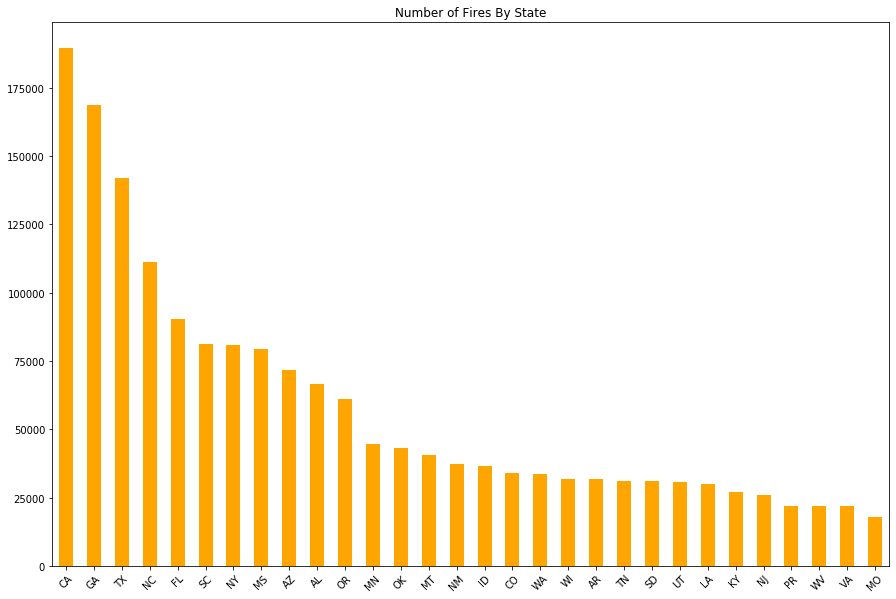

CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
OR     61088
MN     44769
OK     43239
MT     40767
NM     37478
ID     36698
CO     34157
WA     33513
WI     31861
AR     31663
TN     31154
SD     30963
UT     30725
LA     30013
KY     27089
NJ     25949
PR     22081
WV     21967
VA     21833
MO     17953
NV     16956
ND     15201
WY     14166
ME     13150
AK     12843
MI     10502
HI      9895
PA      8712
NE      7973
KS      7673
CT      4976
IA      4134
MD      3622
OH      3479
MA      2626
NH      2452
IL      2327
IN      2098
RI       480
VT       456
DE       171
DC        66
Name: STATE, dtype: int64


In [10]:
plt.rcParams['figure.figsize'] = [15, 10]
df['STATE'].value_counts().head(n=30).plot(kind='bar',color='orange',rot=45,title="Number of Fires By State")
plt.show()
print(df['STATE'].value_counts())

### Largest Fire By Year and State

         FIRE_YEAR  FIRE_SIZE STATE       DATE
45373         1992   177544.0    ID 1992-08-19
210651        1993   215360.0    AK 1993-07-14
67591         1994   146400.0    ID 1994-07-28
223486        1995    64193.0    ID 1995-07-29
224699        1996   206202.6    ID 1996-08-27
211296        1997   606945.0    AK 1997-06-25
1635044       1998    55375.0    TX 1998-05-30
211547        1999   232828.0    AK 1999-06-20
132150        2000   172135.0    ID 2000-07-10
305246        2001   112112.0    AK 2001-06-20
153705        2002   499945.0    OR 2002-07-13
163770        2003   280059.0    CA 2003-10-25
305585        2004   537627.0    AK 2004-06-13
1059558       2005   248310.0    AZ 2005-06-21
352785        2006   479549.0    TX 2006-03-12
1064940       2007   367785.0    ID 2007-07-21
654163        2008   220000.0    TX 2008-02-25
1215267       2009   517078.0    AK 2009-06-21
1216965       2010   306113.0    ID 2010-08-21
1459664       2011   538049.0    AZ 2011-05-29
1579574      

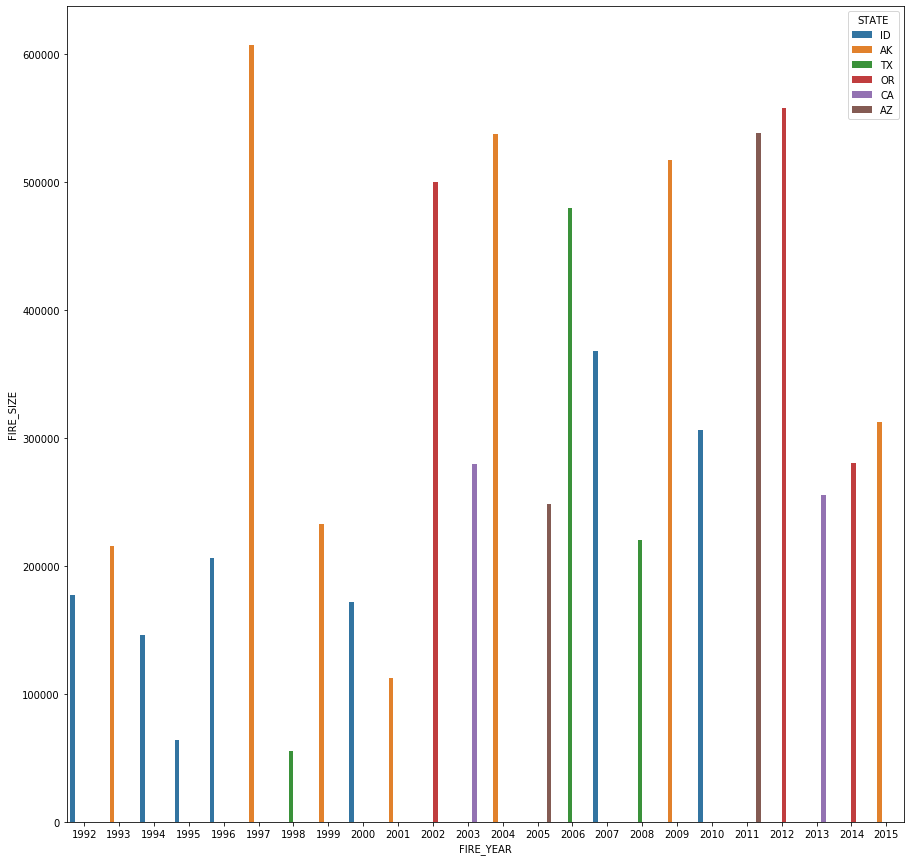

In [36]:
df2 = df[df['FIRE_SIZE'].isin(df.groupby('FIRE_YEAR')['FIRE_SIZE'].max().values)]
df3=df2.sort_values(by=['FIRE_YEAR'])
print(df3[['FIRE_YEAR', 'FIRE_SIZE','STATE','DATE']])
sns.barplot(x="FIRE_YEAR", y="FIRE_SIZE", hue="STATE", data=df3)


###  Reverse GeoCoding in Python
   **Used GeoPy library** https://geopy.readthedocs.io/en/stable/

In [16]:
geolocator = Nominatim(user_agent='WFirestesting')

def get_zipcode(df, geolocator, lat_field, lon_field):
    search_key = 'postcode'
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    if search_key in location.raw['address']: 
        return(location.raw['address']['postcode'])         
    else: 
        return None
 
 # df['zip'] = df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='LATITUDE', lon_field='LONGITUDE')
 
 # Limit to CA and year 2015
cnx = sqlite3.connect('./data/FPA_FOD_20170508.sqlite')
df_CA = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE FROM 'Fires' WHERE STATE='CA' AND FIRE_YEAR > 2014", cnx)

# Print number of fires in CA in year 2015
print(df_CA.shape[0])

# close the connection
cnx.close() 


# Chunk df_CA dataframe and fill out the 'zip' column
#n = 500 
#list_df=[]

# Use List comprehension to create list of dataframes
# [ expression for item in list if conditional ]

#list_df = [df_CA[i:i+n] for i in range(0,df_CA.shape[0],n)]

#for idx in range(len(list_df)):
#    list_df[idx]['zip'] = list_df[idx].apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='LATITUDE', lon_field='LONGITUDE')

# Concatenate all dataframes and write to disk for use later
#df_result = pd.concat(list_df)
#df_result.to_csv('./data/CAfireswithrawzip.csv')


7365


In [15]:
df_CA_zip_raw = pd.DataFrame(pd.read_csv('./data/CAfireswithrawzip.csv'))

def cleanzip(zip_str):
    try:
        return int(zip_str.split('-')[0])
    except:
        return 0
        
#df_CA_zip_raw['zip'] = df_CA_zip_raw['zip'].apply(cleanzip)
#df_CA_zip_raw.to_csv('./data/CAfireswithcleanzip.csv')

df_CA_zip  = pd.DataFrame(pd.read_csv('./data/CAfireswithcleanzip.csv'))
df_CA_zip['zip'] = df_CA_zip['zip'].apply(np.int64)
df_CA_zip.info()
df_CA_zip.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4835 non-null   int64  
 1   FIRE_YEAR         4835 non-null   int64  
 2   STAT_CAUSE_DESCR  4835 non-null   object 
 3   LATITUDE          4835 non-null   float64
 4   LONGITUDE         4835 non-null   float64
 5   STATE             4835 non-null   object 
 6   DISCOVERY_DATE    4835 non-null   float64
 7   FIRE_SIZE         4835 non-null   float64
 8   zip               4835 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 340.1+ KB


,Unnamed: 0,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,zip
0,523,2015,Lightning,40.384167,-123.395833,CA,2457233.5,0.10,95552
1,529,2015,Miscellaneous,40.733333,-123.200278,CA,2457181.5,0.10,96048
2,541,2015,Lightning,40.673889,-123.211667,CA,2457208.5,0.25,96010
3,546,2015,Lightning,41.017500,-122.694444,CA,2457183.5,0.13,96091
4,549,2015,Lightning,40.755556,-123.199444,CA,2457212.5,0.10,96048
5,553,2015,Equipment Use,40.796389,-123.395556,CA,2457250.5,0.25,96048
6,557,2015,Equipment Use,40.806389,-123.471111,CA,2457321.5,0.10,95527
7,558,2015,Debris Burning,40.905833,-122.765556,CA,2457329.5,0.10,69091
8,567,2015,Lightning,40.005000,-122.134167,CA,2457209.5,0.15,96090
9,570,2015,Lightning,37.246389,-119.205000,CA,2457178.5,0.10,93605


### PART II
### Causes of Fires

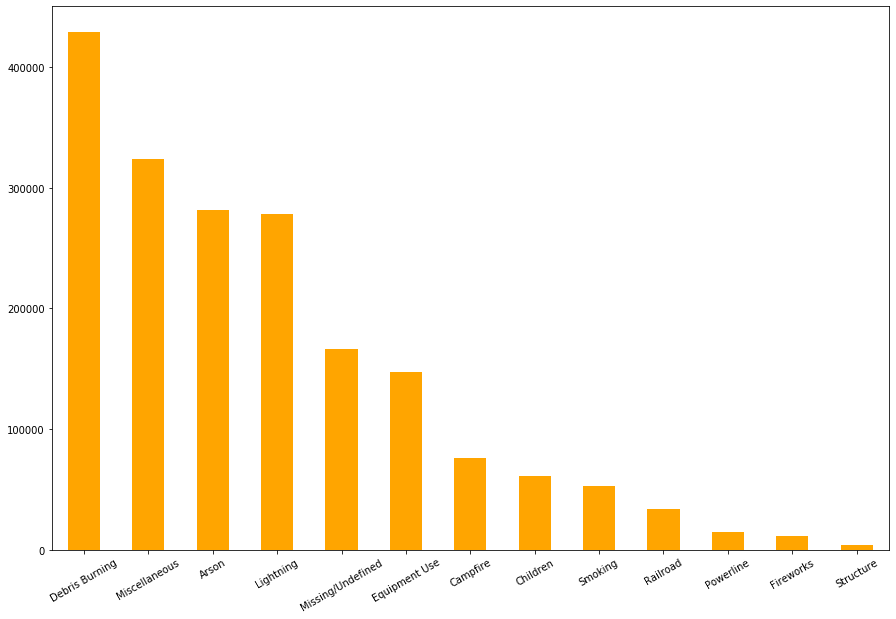

In [28]:
df['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar',color='orange',rot=30)
plt.show()

### Causes of Fires in CA

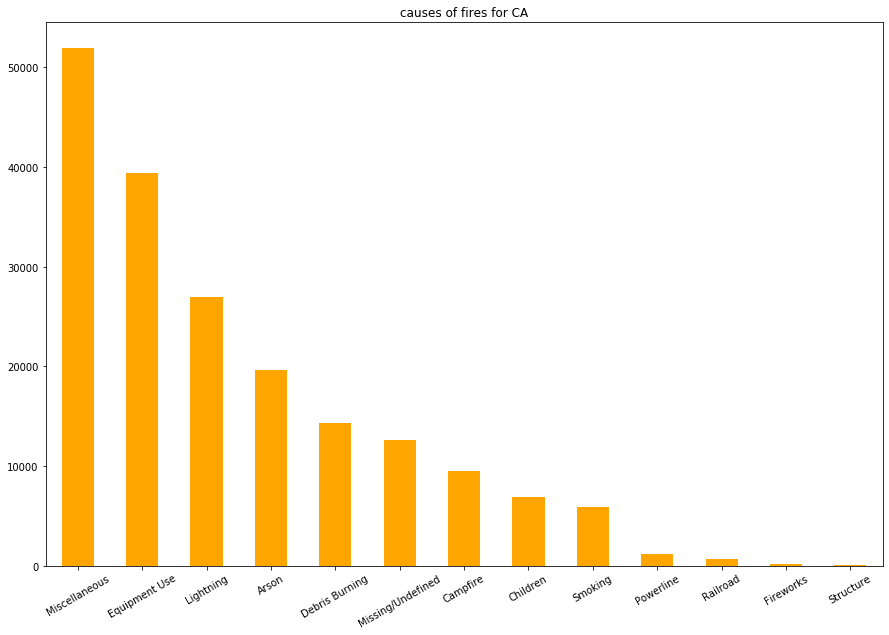

In [29]:
df_CA = df[df['STATE']=='CA']
df_CA['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar',color='orange',rot=30,title='causes of fires for CA')
plt.show()

### Correlation between WildFires data and Air Pollution data 

In [39]:
df_pollution = pd.read_csv('./data/pollution_us_2000_2016.csv')

## Take subset of columns state ,date, O3 AQI
df_pollution_state = df_pollution[['State','Date Local','O3 AQI']]
df_pollution_state.columns = ['State','Date Local','AQI']

# Remove NAs from rows
df_pollution_state = df_pollution_state.dropna(axis='rows')  

# Remove Mexico
df_pollution_state = df_pollution_state[df_pollution_state!='Country Of Mexico']

# Format Date field
df_pollution_state['Dateformatted'] = pd.to_datetime(df_pollution_state['Date Local'],format='%Y-%m-%d')   
df_pollution_state['FIRE_YEAR'] = pd.DatetimeIndex(df_pollution_state['Dateformatted']).year

df_pollution_state_CA = df_pollution_state[df_pollution_state['State']=='California']
df_pollution_state_CA.loc[:,'STATE']='CA'

df_pollution_state_CA_grouped = df_pollution_state_CA.groupby(['STATE','FIRE_YEAR']).mean()
print(df_pollution_state_CA_grouped)


                       AQI
STATE FIRE_YEAR           
CA    2000       32.715206
      2001       34.298837
      2002       35.386263
      2003       35.599164
      2004       34.657625
      2005       33.465433
      2006       34.933054
      2007       34.514307
      2008       36.653721
      2009       35.336751
      2010       33.543562
      2011       35.759769
      2012       35.912286
      2013       37.687996
      2014       40.746230
      2015       41.070276
      2016       32.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATE      16 non-null     object 
 1   FIRE_YEAR  16 non-null     int64  
 2   mean       16 non-null     float64
 3   max        16 non-null     float64
 4   count      16 non-null     float64
 5   50%        16 non-null     float64
 6   75%        16 non-null     float64
 7   AQI        16 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ KB


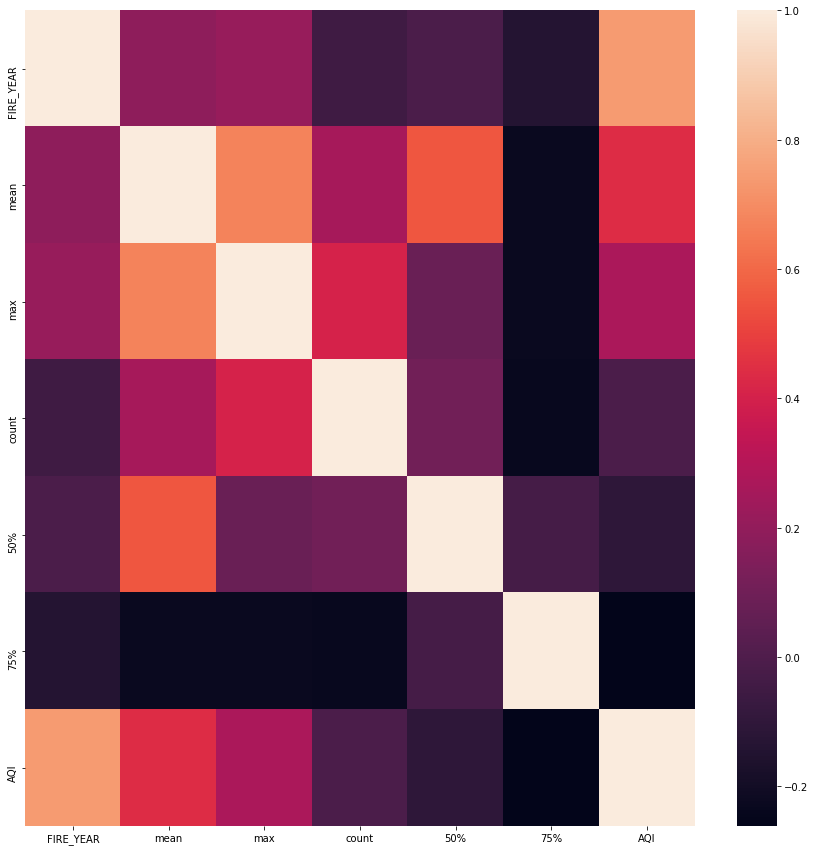

In [37]:
cnx = sqlite3.connect('./data/FPA_FOD_20170508.sqlite')
df_CA_allfires = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE FROM 'Fires' WHERE STATE='CA'", cnx)
df_fires_CA_grouped = df_CA_allfires.groupby(['STATE','FIRE_YEAR'])['FIRE_SIZE'].describe()[['mean','max','count', '50%', '75%']]
cnx.close()

df_merge = df_fires_CA_grouped.join(df_pollution_state_CA_grouped,how='inner').reset_index()
df_merge.info()

plt.rcParams['figure.figsize'] = [15, 15]
sns.heatmap(df_merge.corr())

### CONCLUSION
* FOR THE GIVEN **DATASET FIRES IN CA (2000-20015) AND POLLUTION DATA IN CA (2000-20015)** I FIND A **POSITIVE COORELATION** BETWEEN FIRE YEAR, FIRE SIZE MEAN AND FIRE SIZE MAX.